In [2]:
# Import pustaka dasar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Import pustaka machine learning
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
# Muat dataset penyakit jantung
data = pd.read_csv('heart.csv')

# Melihat 5 baris pertama
print(data.head())

# Menampilkan ringkasan informasi data
print(data.info())


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 

               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000000     0.000000    71.000000  

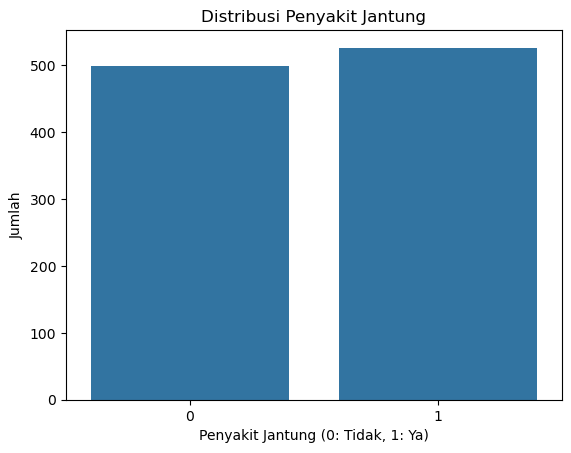

In [4]:
# Hitung statistik deskriptif
print(data.describe())

# Distribusi target (0 = tidak ada penyakit jantung, 1 = ada penyakit jantung)
print(data['target'].value_counts())

# Visualisasi distribusi target
sns.countplot(x='target', data=data)
plt.title('Distribusi Penyakit Jantung')
plt.xlabel('Penyakit Jantung (0: Tidak, 1: Ya)')
plt.ylabel('Jumlah')
plt.show()


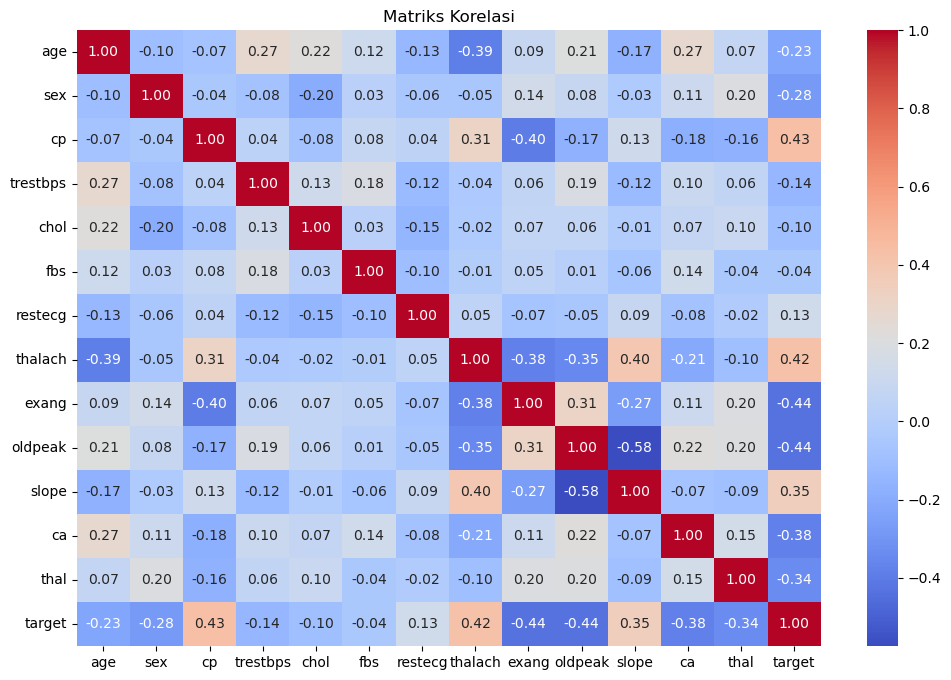

In [5]:
# Korelasi antara fitur
corr_matrix = data.corr()

# Visualisasi korelasi dalam bentuk heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Matriks Korelasi')
plt.show()


In [6]:
# Pisahkan fitur dan target
X = data.drop('target', axis=1)
y = data['target']

# Bagi dataset menjadi data latih dan data uji dengan perbandingan 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standarisasi fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [7]:
# Inisialisasi model Logistic Regression
logistic_model = LogisticRegression(random_state=42)

# Latih model
logistic_model.fit(X_train_scaled, y_train)

# Prediksi pada data uji
y_pred_logistic = logistic_model.predict(X_test_scaled)


Accuracy (Logistic Regression): 0.80


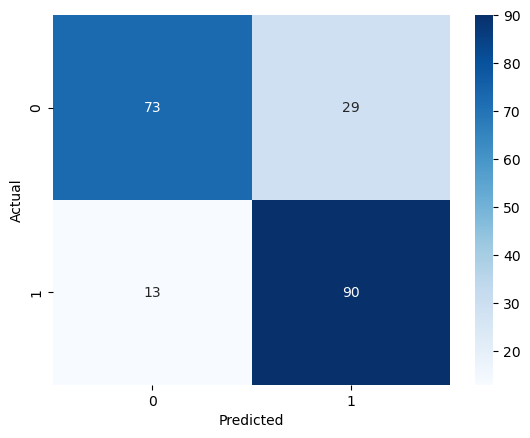

              precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205



In [8]:
# Evaluasi akurasi
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print(f'Accuracy (Logistic Regression): {accuracy_logistic:.2f}')

# Matriks confusion
conf_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)
sns.heatmap(conf_matrix_logistic, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Laporan klasifikasi
print(classification_report(y_test, y_pred_logistic))


In [10]:
from sklearn.ensemble import RandomForestClassifier

# Inisialisasi model Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Latih model
rf_model.fit(X_train_scaled, y_train)

# Prediksi pada data uji
y_pred_rf = rf_model.predict(X_test_scaled)


Accuracy (Random Forest): 0.99


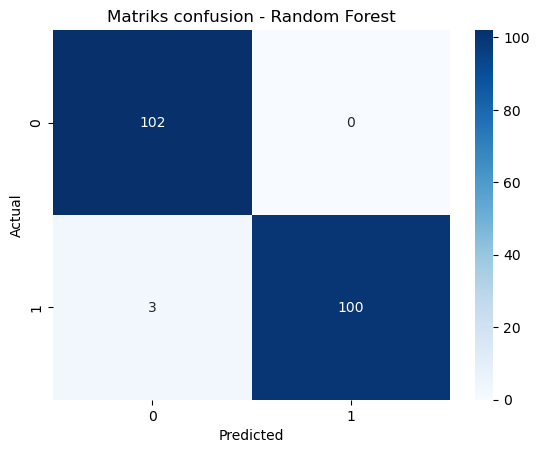

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



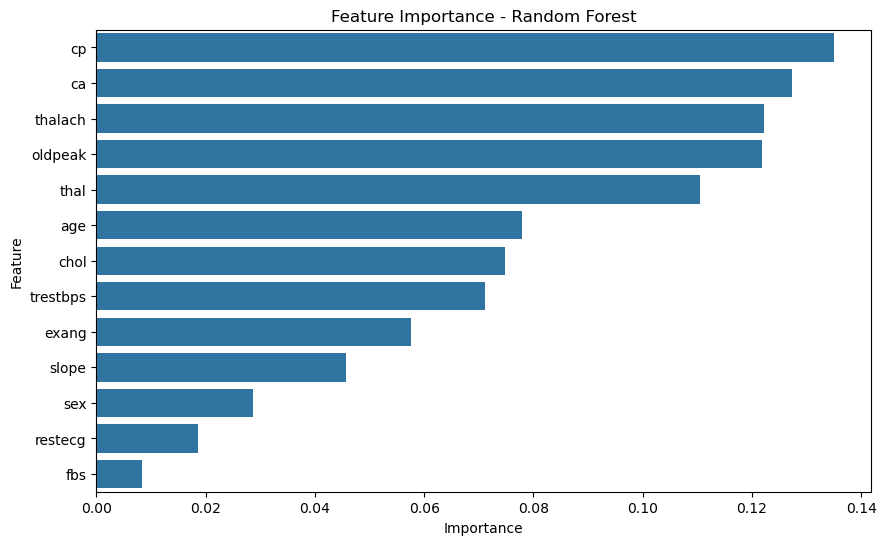

In [12]:
# Evaluasi akurasi
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy (Random Forest): {accuracy_rf:.2f}')

# Matriks confusion
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriks confusion - Random Forest')
plt.show()

# Laporan klasifikasi
print(classification_report(y_test, y_pred_rf))

# Pentingnya fitur
feature_importances = rf_model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Visualisasi Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance - Random Forest')
plt.show()


In [14]:
from sklearn.model_selection import KFold, cross_val_score

# Inisialisasi k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Evaluasi model Logistic Regression dengan cross-validation
cv_scores_logistic = cross_val_score(logistic_model, X_train_scaled, y_train, cv=kf)
print(f'Cross-Validation Scores (Logistic Regression): {cv_scores_logistic}')
print(f'Mean Cross-Validation Score (Logistic Regression): {cv_scores_logistic.mean():.2f}')

# Evaluasi model Random Forest dengan cross-validation
cv_scores_rf = cross_val_score(rf_model, X_train_scaled, y_train, cv=kf)
print(f'Cross-Validation Scores (Random Forest): {cv_scores_rf}')
print(f'Mean Cross-Validation Score (Random Forest): {cv_scores_rf.mean():.2f}')


Cross-Validation Scores (Logistic Regression): [0.90243902 0.84146341 0.84146341 0.88414634 0.82317073]
Mean Cross-Validation Score (Logistic Regression): 0.86
Cross-Validation Scores (Random Forest): [0.99390244 0.93902439 0.99390244 0.99390244 0.9695122 ]
Mean Cross-Validation Score (Random Forest): 0.98
